In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes = True)
pd.set_option('display.max_columns',None)
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('salary.csv')

In [3]:
data.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
28113,21,Private,252253,Some-college,10,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K
6539,33,Private,91811,HS-grad,9,Separated,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,<=50K
31112,33,Private,226525,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,60,United-States,<=50K
26151,54,Local-gov,173050,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,>50K
7577,25,Private,53903,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


# **About Dataset**

Extraction was done by Barry Becker from the 1994 Census database.
Prediction task is to determine whether a person makes over 50K a year.

**Columns are**:



*   **age**: continuous.
*   **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.


*   **fnlwgt**: continuous.
*   **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.


*   **Leducation-num**: continuous.
*   **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.


*   **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
*   **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.


*   **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
*   **sex**: Female, Male.


*   **capital-gain**: continuous.
*   **capital-loss**: continuous.


*   **hours-per-week**: continuous.
*   **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


*   salary: <=50K or >50K


































**Data Preprocessing Part 1**

In [4]:
#check the shape
data.shape

(32561, 15)

In [5]:
#checking data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# looking for missing values
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [7]:
# Now i can check the number of unique values from all object datatype
data.select_dtypes(include='object').nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
salary             2
dtype: int64

Segmenting the native-country column to be smaller unique value

In [8]:
data['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [9]:
# Function to segment countries
def seg_country(country):
  if country in [' United-States',' England',' Canada',' Germany',' Iran',' Italy',' Poland',' Portugal',' France',' Yugoslavia',' Scotland',' Greece',' Ireland',' Hungary',' Holand-Netherlands']:
    return 'Western'
  elif country in [' India',' Japan',' China',' Hong',' Philippines',' Cambodia',' Thailand',' Laos',' Taiwan',' Vietnam']:
    return 'Asia'
  elif country in [' Cuba',' Jamaica',' Mexico',' Puerto-Rico',' Honduras',' Columbia',' Ecuador',' Haiti',' Dominican-Republic',' El-salvador',' Guatemala',' Peru',' Trinadad&Tobago',' Nicaragua']:
    return 'Latin_American'
  else:
    return 'Other'

# Apply the function to create new column 'Region'
data['region'] = data['native-country'].apply(seg_country)

Western           29855
Latin_American     1295
Other               783
Asia                628
Name: region, dtype: int64


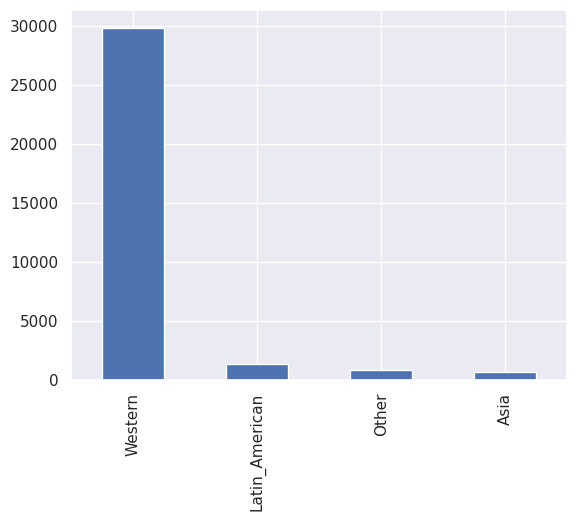

In [10]:
print(data['region'].value_counts())
data['region'].value_counts().plot(kind='bar')
plt.show()

**Exploratory Data Analysis**

In [11]:
# Get the names of all columns with data type 'object'
variable = data.select_dtypes(include='object').columns.to_list()
variable

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary',
 'region']

The enumerate () method adds a counter to an iterable and returns it in the form of an enumerating object.

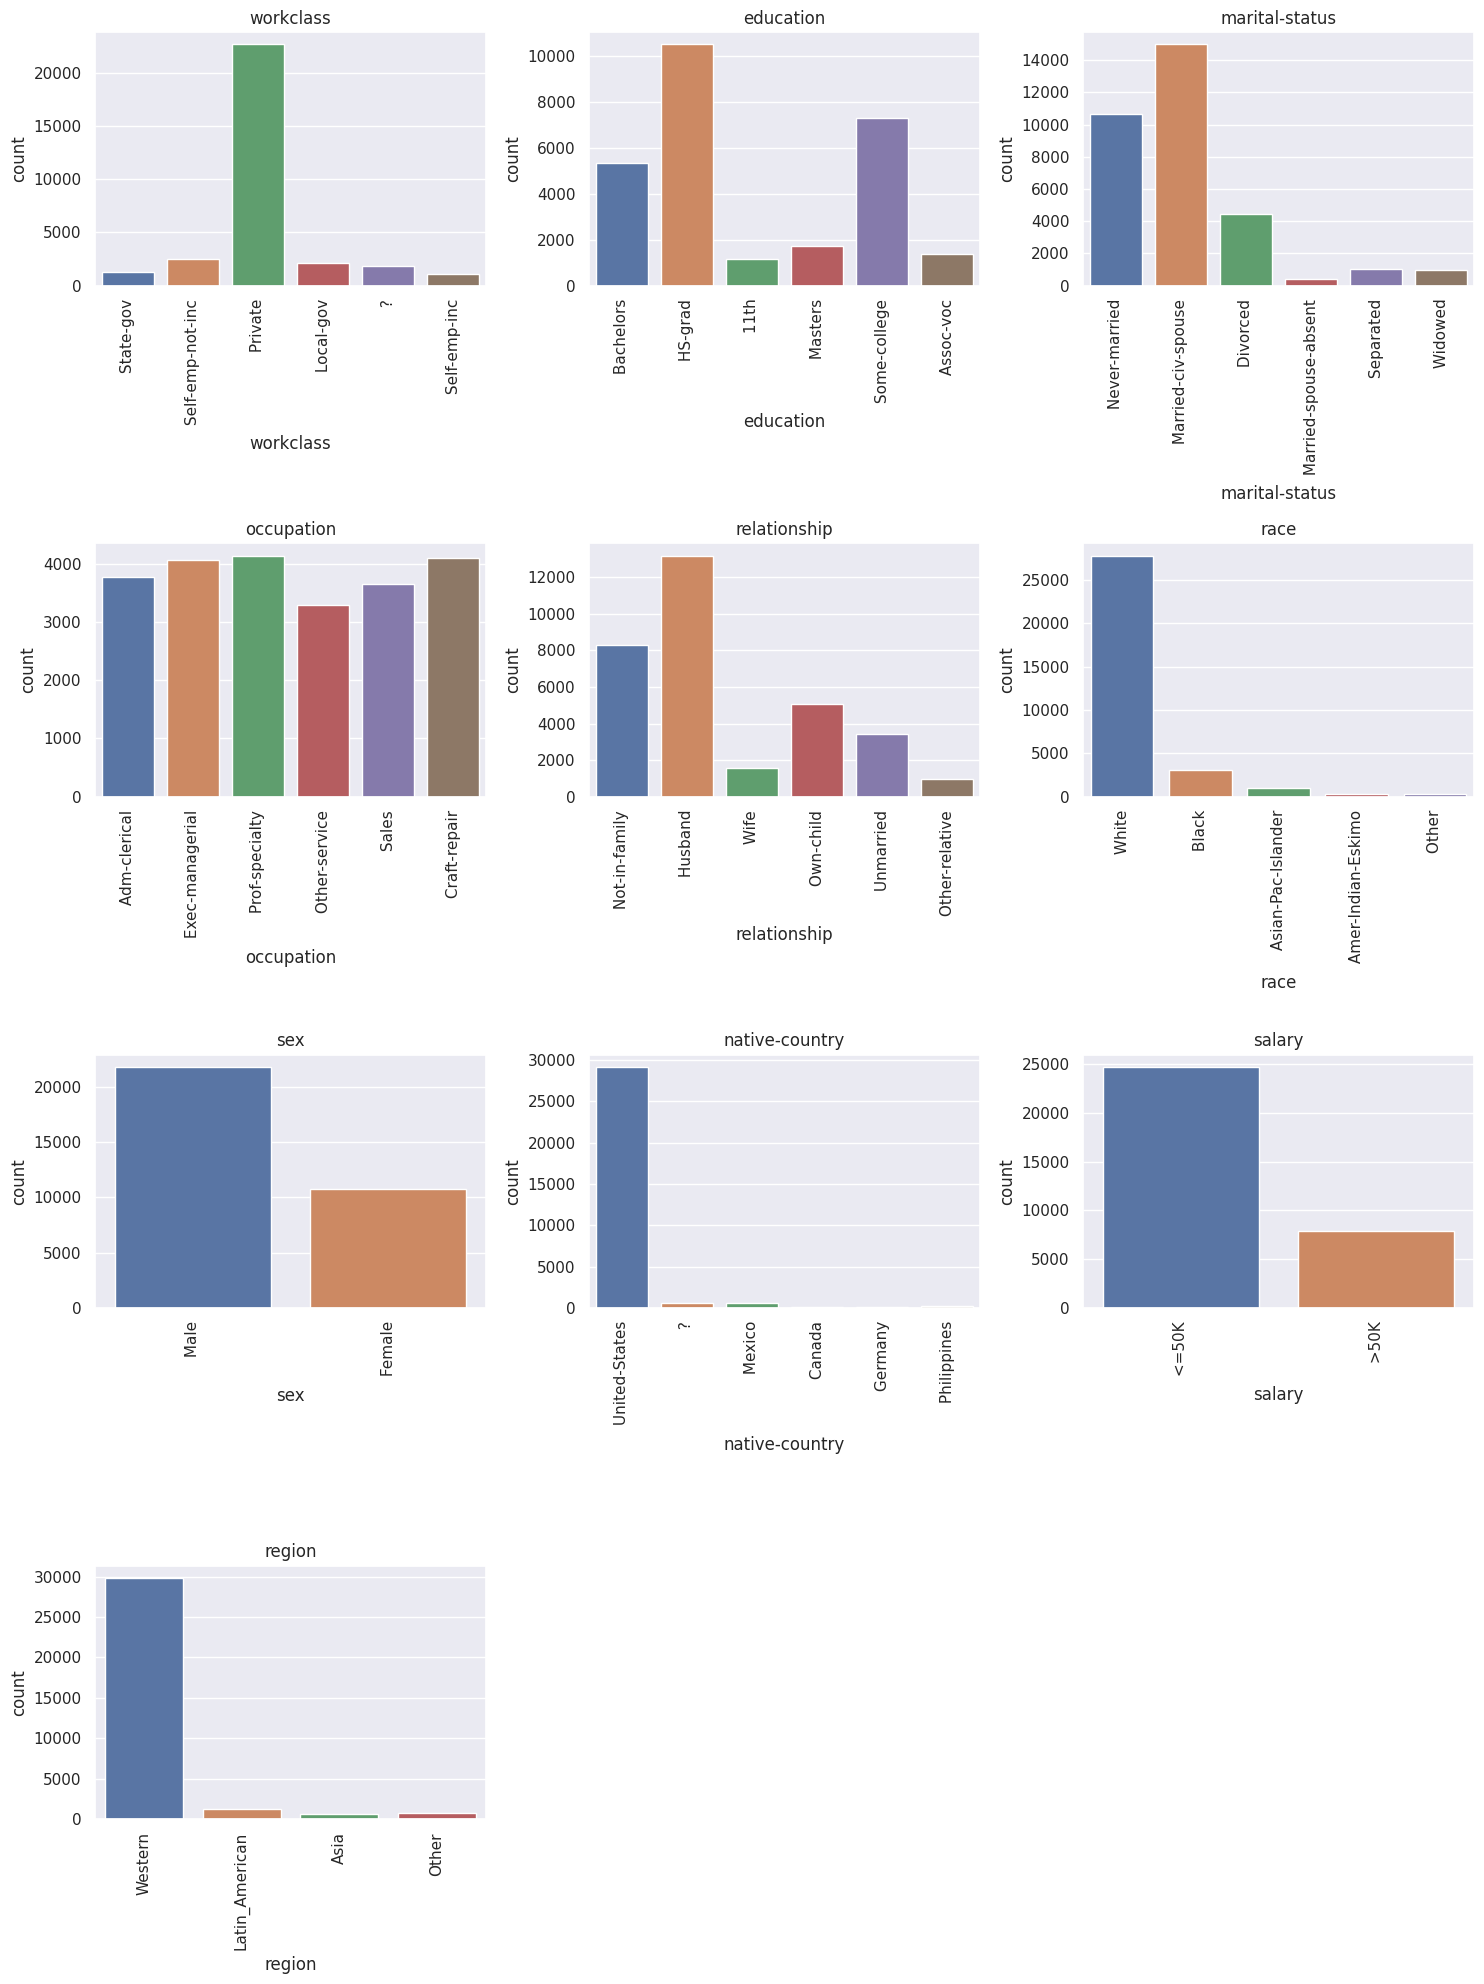

In [12]:
# Create a figure with subplots
num_cols = len(variable)
num_rows = (num_cols + 2) // 3
fig,axs = plt.subplots(nrows=num_rows, ncols=3,figsize=(15,5*num_rows))
axs = axs.flatten()

# Create a countplot for the top 6 vales of each categorical variable
for i, var in enumerate(variable):
  top_values = data[var].value_counts().nlargest(6).index
  filter = data[data[var].isin(top_values)]
  sns.countplot(x=var, data=filter, ax=axs[i])
  axs[i].set_title(var)
  axs[i].tick_params(axis='x', rotation=90)


# Remove any extra empty subplots if needed
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjusting spaces between subplots
fig.tight_layout()

plt.show()

In [13]:
# Get the names of all columns with data type 'int' or 'float'
var_num = data.select_dtypes(include=['int', 'float']).columns.tolist()
var_num

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

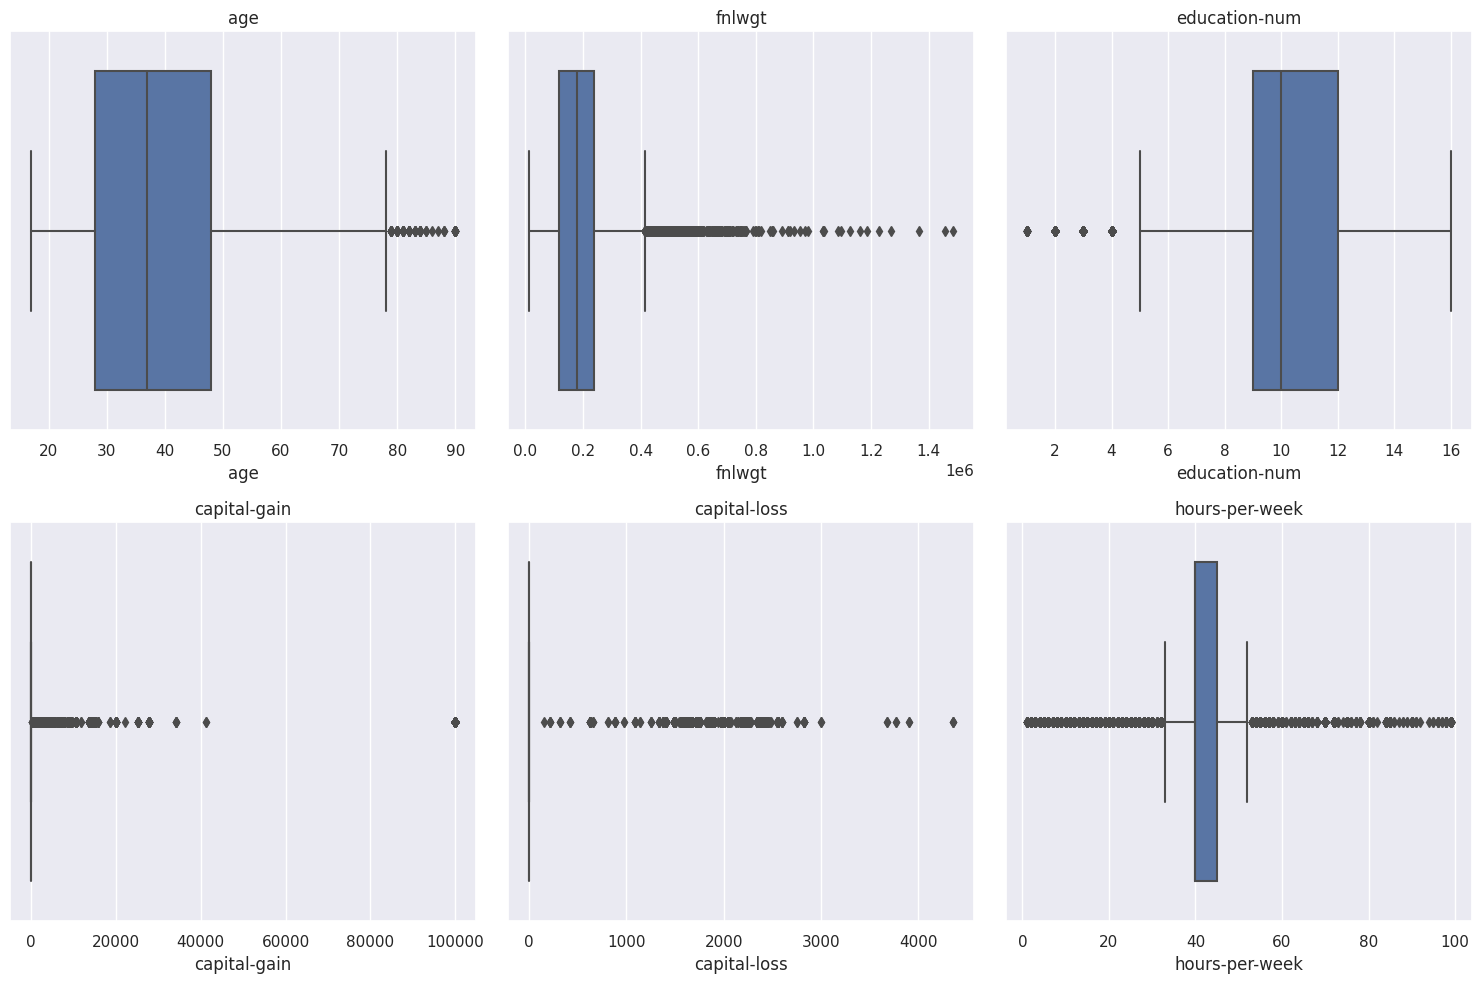

In [14]:
# Create a figure subplots
num_cols = len(var_num)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a boxplot for each numerical variable
for i, var in enumerate(var_num):
  sns.boxplot(x=data[var], ax = axs[i])
  axs[i].set_title(var)


# Remove any extra empty subplots if needed
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjusting spaces between subplots
fig.tight_layout()

plt.show()

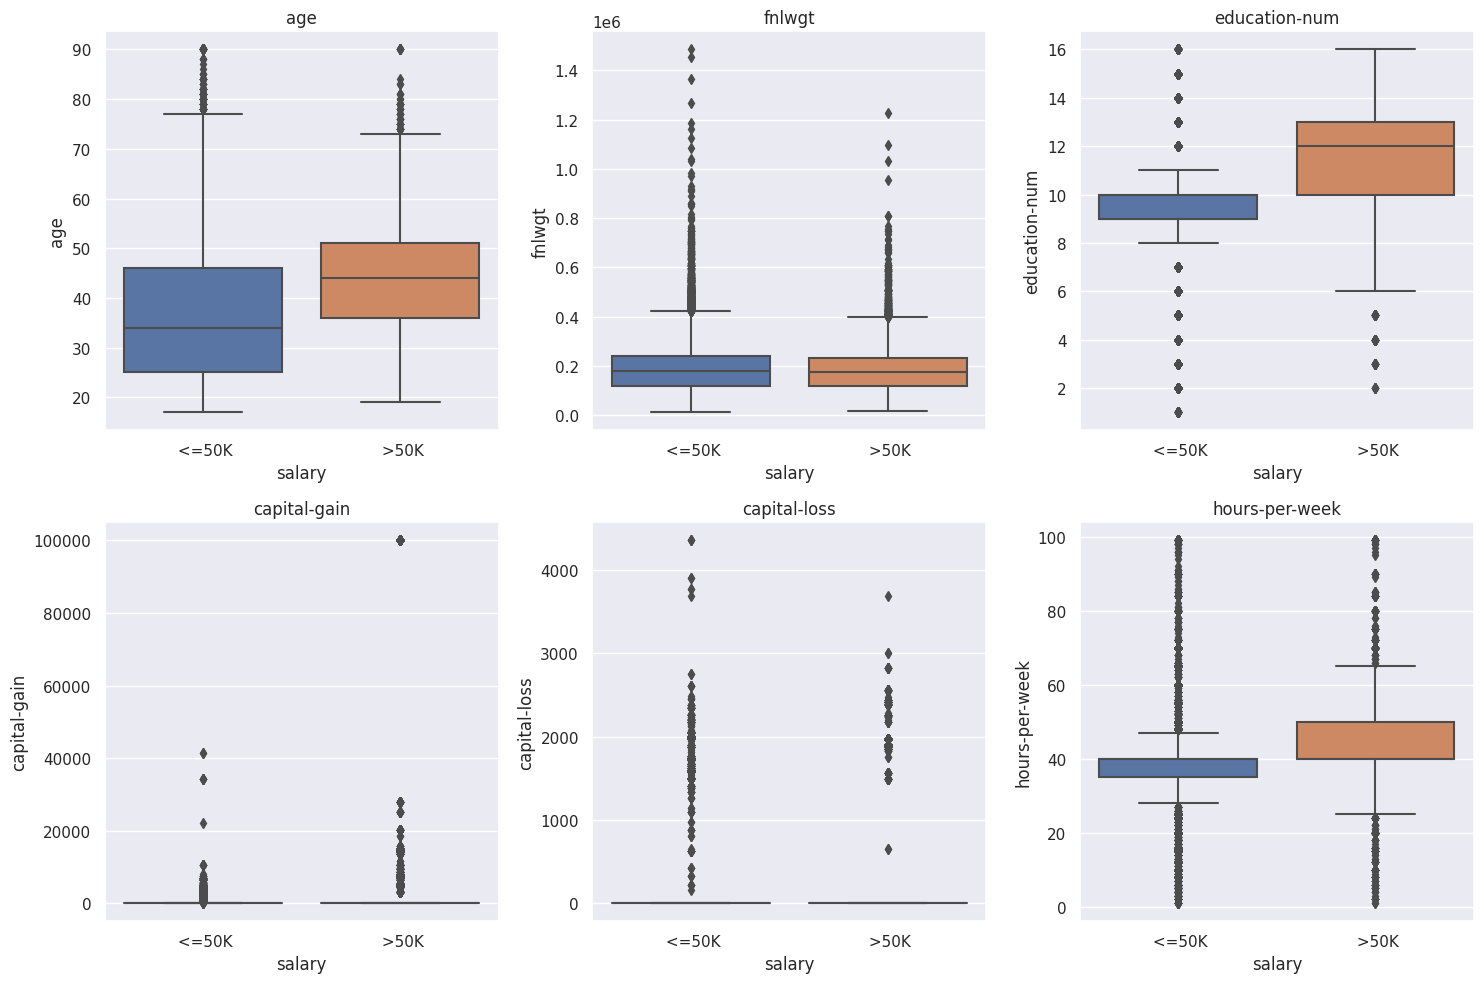

In [15]:
# Get the names of all columns with datatype 'int'
int_var = data.select_dtypes(include='int').columns.tolist()
int_var

# Create a figure subplots
num_cols = len(int_var)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a boxplot for each integer variable comparing the salary
for i, var in enumerate(var_num):
  sns.boxplot(y=var, x='salary',data=data, ax = axs[i])
  axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjusting spaces between subplots
fig.tight_layout()

plt.show()

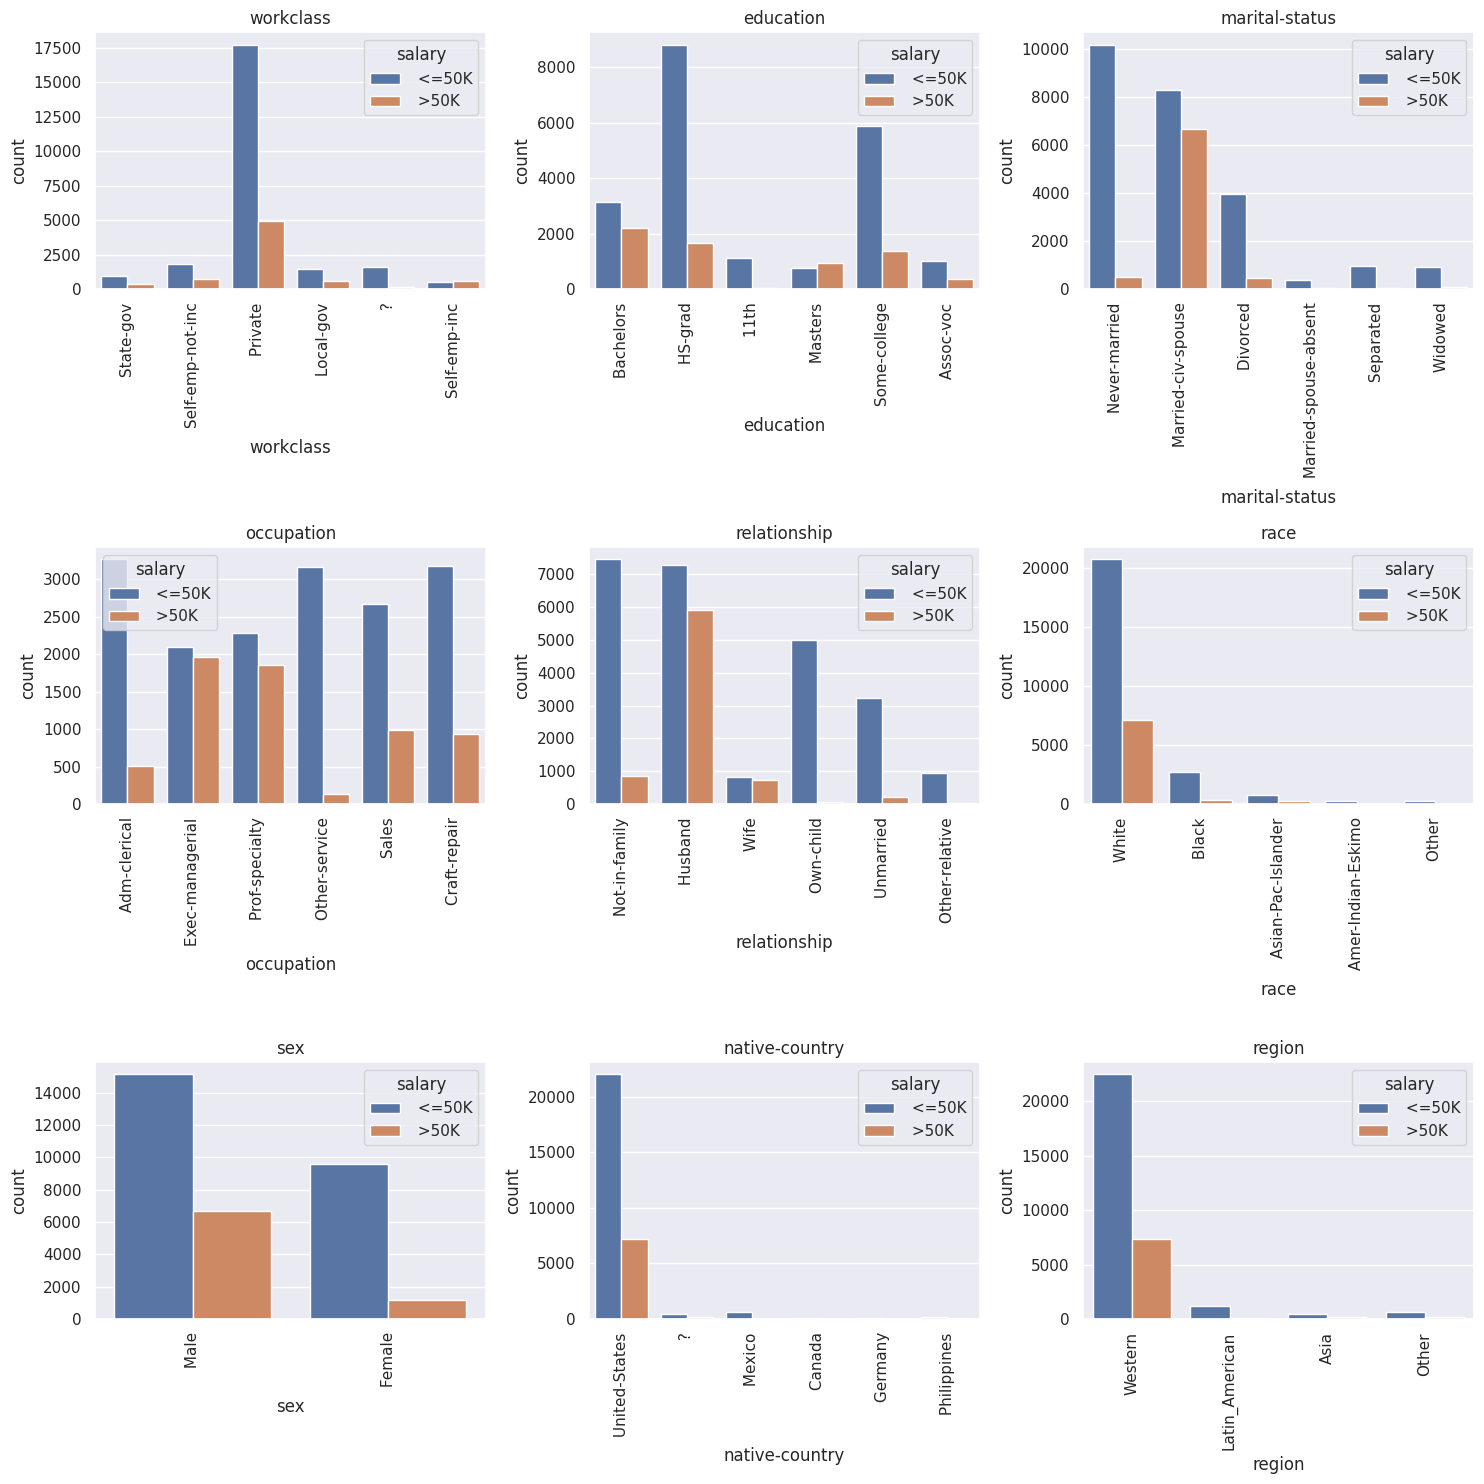

In [16]:
# Get the names of all colums with datatype 'object'
cat_vars = data.select_dtypes(include='object').columns.tolist()

# Exclude the salary column from the list
if 'salary' in cat_vars:
  cat_vars.remove('salary')

# Create a figure subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()


# Create a countplot for the top 6 vales of each categorical variable
for i, var in enumerate(cat_vars):
  top_values = data[var].value_counts().nlargest(6).index
  filter = data[data[var].isin(top_values)]
  sns.countplot(x=var,hue='salary', data=filter, ax=axs[i])
  axs[i].set_title(var)
  axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjusting spaces between subplots
fig.tight_layout()

plt.show()

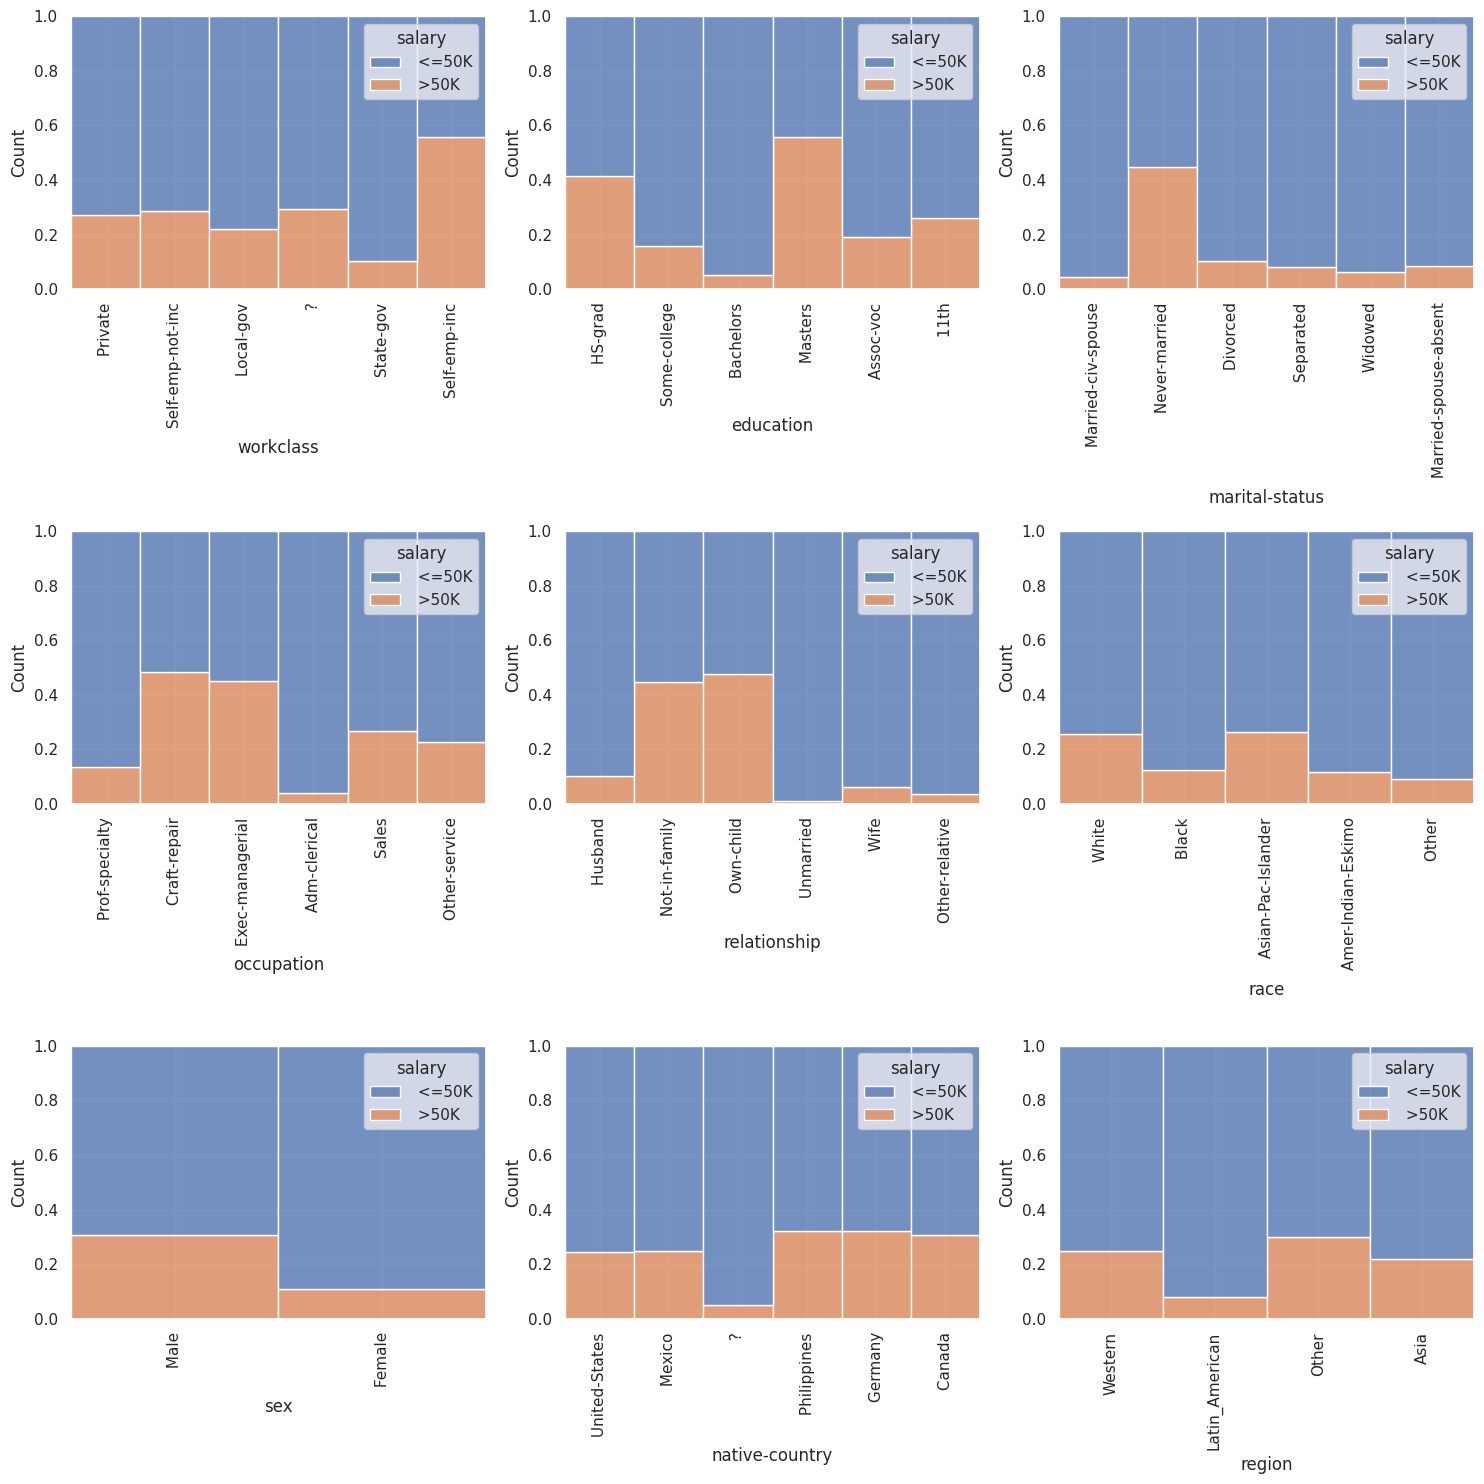

In [17]:
# Get the names of all colums with datatype 'object'
cat_vars = data.select_dtypes(include='object').columns.tolist()

# Exclude the salary column from the list
if 'salary' in cat_vars:
  cat_vars.remove('salary')

# Create a figure subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()


# Create a countplot for the top 6 vales of each categorical variable
for i, var in enumerate(cat_vars):
  top_values = data[var].value_counts().nlargest(6).index
  filter = data[data[var].isin(top_values)]

  # Set x_tick positions explicitly
  tick_positions = range(len(top_values))
  axs[i].set_xticks(tick_positions)
  axs[i].set_xticklabels(top_values, rotation=90) # Set x_ticks labels

  sns.histplot(x=var, hue='salary', data=filter, ax=axs[i], multiple='fill', kde=False, fill=True)
  axs[i].set_xlabel(var)

# Remove any remaining blank subplots
for i in range(num_cols,len(axs)):
  fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

plt.show()

**Data Preprocessing**

In [18]:
# Check the amount of missing value
check_missing = data.isnull().sum()*100 / data.shape[0]
check_missing[check_missing > 0].sort_values()

Series([], dtype: float64)

In [19]:
# Drop native-country column
data.drop(columns='native-country', inplace=True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary,region
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K,Western
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K,Western
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K,Western
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K,Western
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K,Latin_American


**Label Encoding for Object Datatypes**

In [20]:
# Looking for column with datatype 'object'
for column in data.select_dtypes(include='object').columns:

  # Print column and unique values
  print(f"{column}: {data[column].unique()}")

workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex: [' Male' ' Female']
salary: [' <=50K' ' >50K']
region: ['Western' 'Latin_Am

In [21]:
# Looking for column with datatype 'object'
for column in data.select_dtypes(include='object').columns:

  # Initialize a labelEncoder object
  encoder = preprocessing.LabelEncoder()

  # Fit the encoder to the unique values in the column
  encoder.fit(data[column].unique())

  # Transform the column using the encoder
  data[column] = encoder.transform(data[column])

  # Print the encoded values
  print(f'{column}: {data[column].unique()}')

workclass: [7 6 4 1 2 0 5 8 3]
education: [ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
marital-status: [4 2 0 3 5 1 6]
occupation: [ 1  4  6 10  8 12  3 14  5  7 13  0 11  2  9]
relationship: [1 0 5 3 4 2]
race: [4 2 1 0 3]
sex: [1 0]
salary: [0 1]
region: [3 1 0 2]


<Axes: >

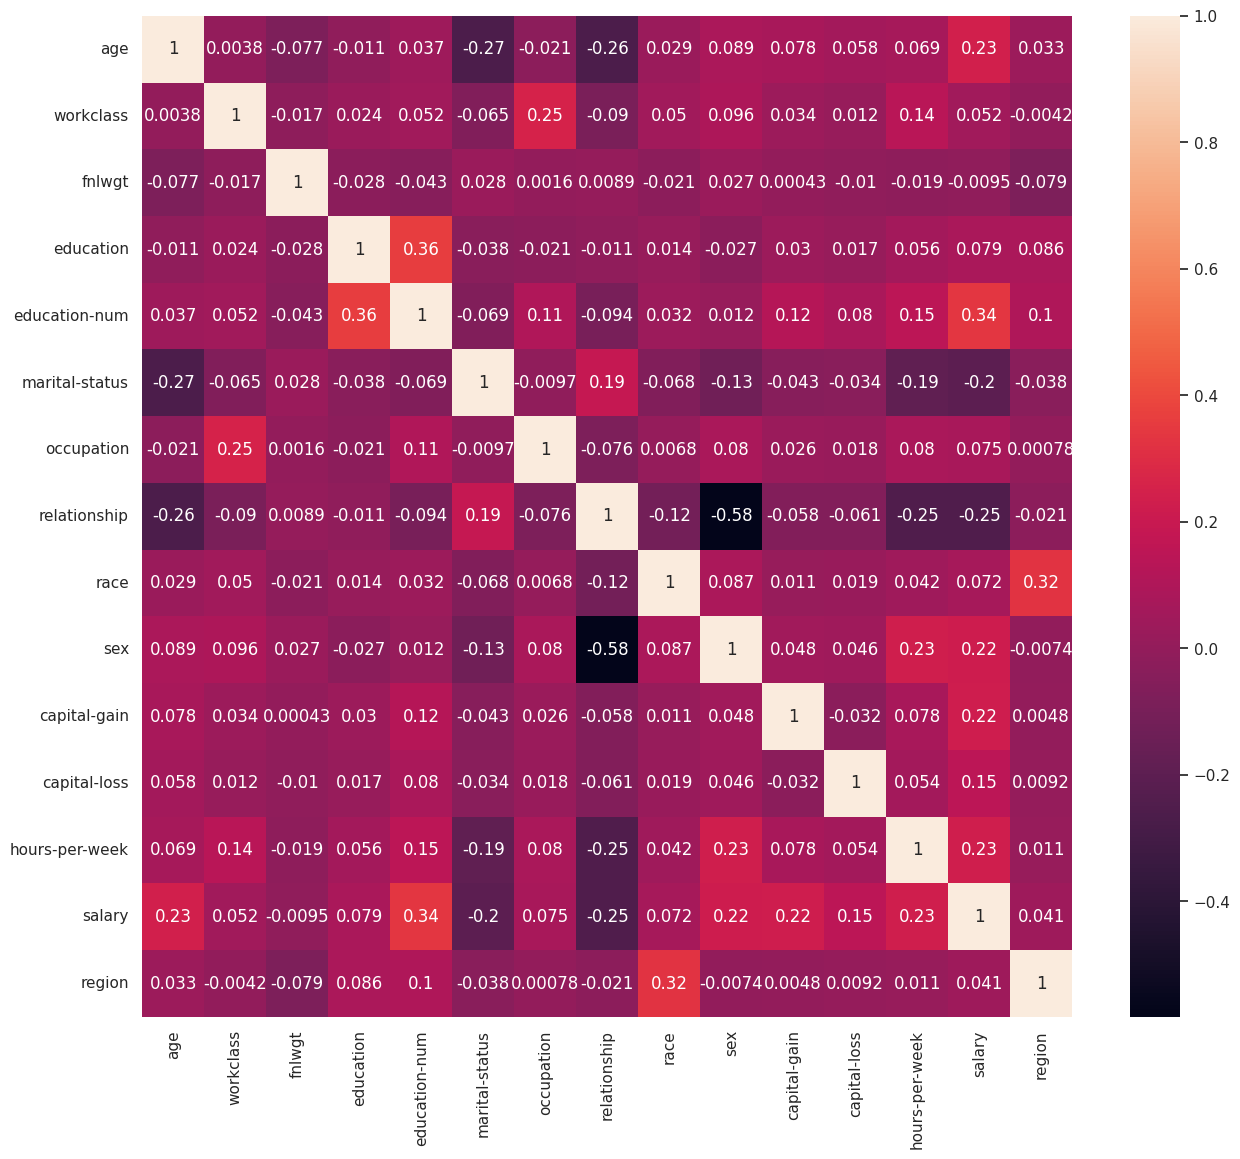

In [22]:
#Correlation Heatmap
plt.figure(figsize=(15,13))
sns.heatmap(data.corr(), annot=True)

**Train Test Split**

In [23]:
x = data.drop('salary', axis=1)
y = data['salary']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

**Remove the outliers using Z-score**

In [24]:
data[['age','fnlwgt','capital-gain']]

,age,fnlwgt,capital-gain
0,39,77516,2174
1,50,83311,0
2,38,215646,0
3,53,234721,0
4,28,338409,0
...,...,...,...
32556,27,257302,0
32557,40,154374,0
32558,58,151910,0
32559,22,201490,0


In [25]:
from scipy import stats

# Define the columns for which you want to remove outleirs
select_columns = ['age','fnlwgt','capital-gain','capital-loss','hours-per-week']

# Calculate the z-scores for the selected columns in the training data
z_score = np.abs(stats.zscore(x_train[select_columns]))

# Set a threshold for outlier detection(eg:3)
threshold = 3

# Find indice of the outlier based on threshold
outlier = np.where(z_score > threshold)[0]

# Remove the outliers from training data
x_train_df = x_train.drop(x_train.index[outlier])
y_train_df = y_train.drop(y_train.index[outlier])

**Decision Tree Classifier**

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3,4,5,6,7,8],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3,4],
    'random_state': [0,42]
}

# Perform a grid search to find the best hyperparameters
grid = GridSearchCV(dtree, param_grid, cv=5)
grid.fit(x_train_df, y_train_df)

# Print hyperparameters
print(grid.best_params_)

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


In [27]:
dtree = DecisionTreeClassifier(class_weight='balanced', max_depth= 6, min_samples_leaf= 1, min_samples_split= 2, random_state= 42)
dtree.fit(x_train_df,y_train_df)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=42)

In [28]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
y_pred = dtree.predict(x_test)
print('Accuracy Score:', round(accuracy_score(y_test,y_pred)*100,2), '%')
print('F-1 Score:', (f1_score(y_test,y_pred, average='micro')))
print('Precision Score:', (precision_score(y_test,y_pred, average='micro')))
print('Recall Score:', (recall_score(y_test,y_pred, average='micro')))
print('Jaccard Score:', (jaccard_score(y_test,y_pred, average='micro')))
print('Log Loss:', (log_loss(y_test,y_pred)))

Accuracy Score: 79.35 %
F-1 Score: 0.7935305558399016
Precision Score: 0.7935305558399017
Recall Score: 0.7935305558399017
Jaccard Score: 0.6577295095876463
Log Loss: 7.441913080750261


In [29]:
imp_df = pd.DataFrame({
    'Feature_Name': x_train_df.columns,
    'Importance': dtree.feature_importances_
})
f1 = imp_df.sort_values(by='Importance', ascending = False)

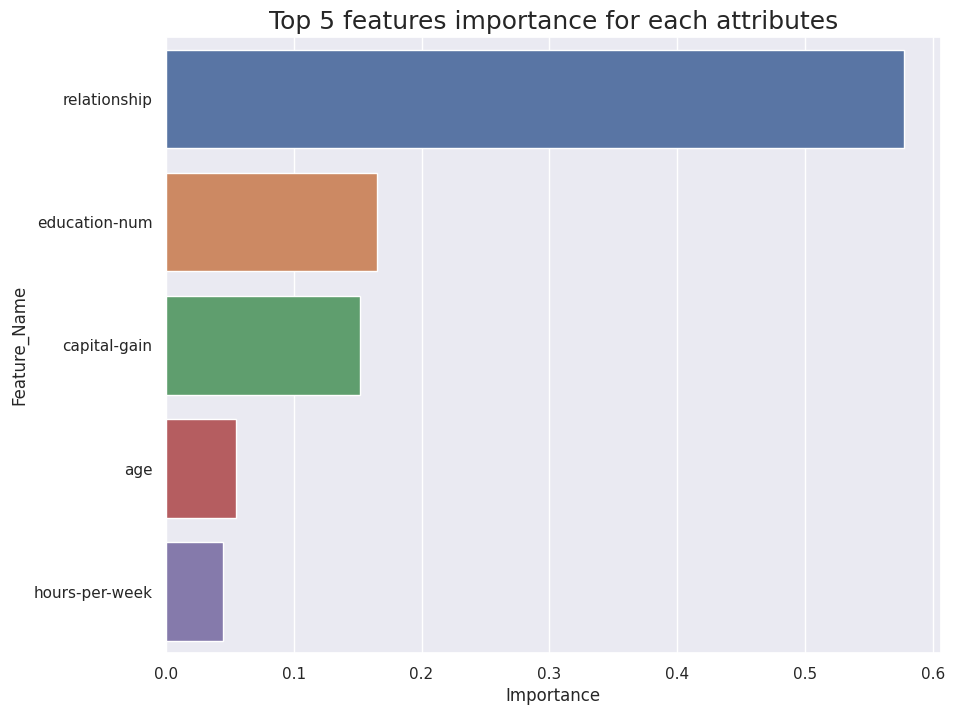

In [30]:
f1 = f1.head(5)
plt.figure(figsize=(10,8))
sns.barplot(data=f1, x='Importance', y='Feature_Name')
plt.title('Top 5 features importance for each attributes', fontsize=18)
plt.show()

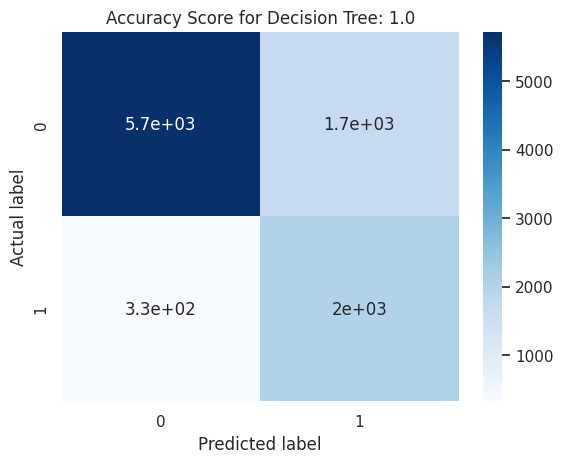

In [31]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(data= cm, annot=True, cmap ='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(x_test,y_pred))
plt.title(all_sample_title)
plt.show()

**Random Forest**

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(class_weight = 'balanced')

param = {
    'n_estimators': [100,200],
    'max_depth': [None,5,10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Performing Grid search
grid_search = GridSearchCV(rfc,param,cv=5)
grid_search.fit(x_train_df, y_train_df)

print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 0}


In [33]:
rfc = RandomForestClassifier()